In [7]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string

plt.rcParams.update(
    {
        "text.usetex": True,
        "font.family": "sans-serif",
        "text.latex.preamble": r'\usepackage[scaled]{helvet}\renewcommand\familydefault{\sfdefault}\usepackage[helvet]{sfmath}\everymath={\sf}',
        
    }
)

In [2]:
losses = []
accs = []
for idx in range(1, 6):
    with open ('acc/fold_' + str(idx) + '_tst.json', 'r') as fh:
        data = json.load(fh)
        accs.append(pd.DataFrame([[step[0], step[1]] for step in data], columns=['epoch', 'accuracy']))
        losses.append(pd.DataFrame([[step[0], step[2]] for step in data], columns=['epoch', 'loss']))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


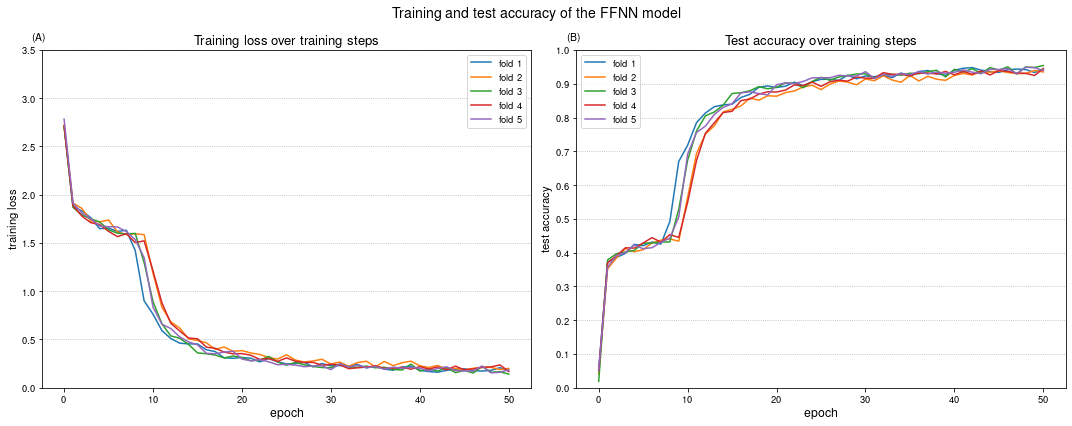

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharex=True)

for idx, (loss, acc) in enumerate(zip(losses, accs), start=1):
    ax1 = loss.plot(x='epoch', y='loss', ax=axes[0], ylim=[0, 3.5])
    ax2 = acc.plot(x='epoch', y='accuracy', ax=axes[1], ylim=[0, 1], legend=None)

    ax2.get_xticks()
    ax1.grid(which='major', axis='y', linestyle=':')
    ax1.grid(False, which='major', axis='x')
    ax2.grid(which='major', axis='y', linestyle=':')
    ax2.grid(False, which='major', axis='x')
    _ = ax2.set_yticks(np.arange(0, 1.1, 0.1))
    ax1.set_title('Training loss over training steps', fontsize=14)
    ax2.set_title('Test accuracy over training steps', fontsize=14)
    ax1.set_ylabel('training loss', fontsize=12)
    ax2.set_ylabel('test accuracy', fontsize=12)
    ax1.set_xlabel('epoch', fontsize=13)
    ax2.set_xlabel('epoch', fontsize=13)

for g in range(0, 2):
    axes[g].legend(['fold ' + str(idx) for idx in range(1, 6)])

fig.suptitle("Training and test accuracy of the FFNN model", fontsize=15)
    
for n, ax in enumerate(axes):
    # ax.imshow(np.random.randn(10,10), interpolation='none')
    ax.text(
        -0.02,
        1.03,
        "(" + string.ascii_uppercase[n] + ")",
        transform=ax.transAxes,
        size=11,
        weight="bold",
    )    

plt.tight_layout()
fig.savefig("acc.eps", bbox_inches="tight", dpi=300)
fig.savefig("acc.png", bbox_inches="tight", dpi=300)
fig.savefig("acc.pdf", bbox_inches="tight", dpi=300)